# Movie Data Set

This dataset is derived from Kaggle "The Movies Dataset".I'll be working with "movies_metadata", the metadata for over 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include budget, revenue, release dates, languages, production companies, countries, TMDB vote counts and vote averages, etc.

Through data information, I can see that the original dataset has 45466 entries, and 24 total columns. Most of columns are object value which cannot be directly feed into neural networks. So I am going to process them and change into numeric variables.

# Overview

* 1) Data Preparation

* 2) Exploratory Data Analysis

* 3) Data Wrangling

* 4) Modeling

* 4-1) Baseline Model: Logistic Regression

* 4-2) Deep Learning Model #1: Dense Neural Network (without dropout)

* 4-3) Deep Learning Model #2: Dense Neural Network (with dropout)

* 4-4) Deep Learning Model #3: Dense Neural Network (with dropout but with different layers)

* Permutation Feature Importance for Neural Network

* Results

* Conclusion

# Data Gathering and Description

In this part, I'll set up the environment, import modules, read the data, and explore our data. Through the data processing, I'll change data types to fit models, handle missing values, and detect any outliers. After that, I'll wrangle the data, split data into X and y, and do some scalling preparing for modeling.

Below are columns of the datasaet:

* adult - Belongs to adult movies or not
* belongs_to_collection - Belong to movie collections or not
* budget - The budget of a movie. Some movies don't have this, it appears as 0
* genres - Main genre of the movie
* homepage - The website where can see the movie
* id - Identifier column
* imdb_id - Movies id on IMDB
* original_language - Original language of film
* original_title - Original title of film
* overview - Movie content overview
* popularity - shows weather it is popular
* poster_path - jpg. path of the movie poster
* production_companies - The production company
* production_countries - Country of origin
* release_date - Release date (YYYY-MM-DD)
* revenue - The revenue of a movie. Some movies don't have this, it appears as 0
* runtime - Duration of the movie
* spoken_languages - Languages spoken throughout the film
* status - Release or others
* tagline - Movie tagline to advertise
* title - English title
* video - True of False
* vote_average - TMDB vote average
* vote_count - TMDB vote count

In [107]:
# for reading data
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stat
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# For data splitting
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling
from sklearn.linear_model import LogisticRegression # LR
from sklearn.tree import DecisionTreeRegressor # DTR
from sklearn.ensemble import RandomForestRegressor # RFR
from sklearn.ensemble import GradientBoostingRegressor #GBR

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# classification error metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# for modeling
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
df = pd.read_csv("/content/drive/MyDrive/Multi-modal-movie-genre-prediction-master/data/movies_metadata.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1) Head, Shape, Column names, data types, missing values, Outliers

In [110]:
#Summary of original dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [111]:
#Shape of original dataset
df.shape

(45466, 24)

There are a total of 45,466 movies with 24 features. Most of the features have very few NaN values (apart from homepage and tagline). I will attempt at cleaning this dataset to a form suitable for analysis in the next section.

In [112]:
#Let's look into first few rows of the dataset to check the content of each column
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# 2) Data Wrangling

In [113]:
# As I will be concentrating on nuerical columns let's delete the text columns, which I donot need for solving the business problem
df.drop(['id','belongs_to_collection', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'runtime', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'video'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   adult         45466 non-null  object 
 1   budget        45466 non-null  object 
 2   genres        45466 non-null  object 
 3   popularity    45461 non-null  object 
 4   revenue       45460 non-null  float64
 5   vote_average  45460 non-null  float64
 6   vote_count    45460 non-null  float64
dtypes: float64(3), object(4)
memory usage: 2.4+ MB


In [114]:
df[df['revenue'] == 0].shape

(38052, 7)

I see that the majority of the movies have a recorded revenue of 0. This indicates that I do not have information about the total revenue for these movies. Although this forms the majority of the movies available to us, I will still use revenue as an extremely important feature going forward from the remaining 7000 movies.

In [115]:
df['revenue'] = df['revenue'].replace(0, np.nan)

The budget feature has some unclean values that makes Pandas assign it as a generic object. I proceed to convert this into a numeric variable and replace all the non-numeric values with NaN. Finally, as with budget, I will convert all the values of 0 with NaN to indicate the absence of information regarding budget.

In [116]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 7)

I will create a return feature that will help us capture a more accurate picture of the financial success of a movie. Presently, our data will not be able to judge if a 200 million dollar budget movie that earned 100 million dollar did better than a 50,000 dollars budget movie taking in 200,000 dollars. This feature will be able to capture that information.

A return value > 1 would indicate profit whereas a return value < 1 would indicate a loss.

In [117]:
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(40085, 8)

I have close to 5000 movies for which I have data on revenue and budget ratio. This is close to 10% of the entire dataset. Although this may seem small, this is enough to perform very useful analysis and discover interesting insights about the world of movies.

In [118]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

There are only 9 adult movies in this dataset. The adult feature therefore is not of much use to us and can be safely dropped.

In [119]:
df = df.drop('adult', axis=1)

Exploring Popularity, Vote Average and Vote Count

In [120]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [121]:
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df["vote_count"] = df["vote_count"].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

In [122]:
#Summary statistics of each feature
df['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


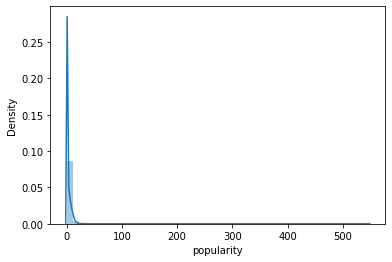

In [123]:
sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()

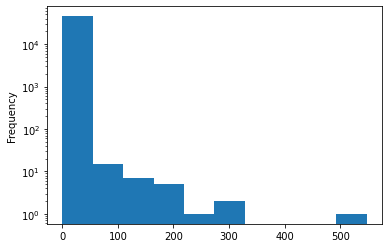

In [124]:
df['popularity'].plot(logy=True, kind='hist')

The Popularity score seems to be an extremely skewed quantity with a mean of only 2.9 but maximum values reaching as high as 547, which is almost 1800% greater than the mean. However, as can be seen from the distribution plot, almost all movies have a popularity score less than 10 (the 75th percentile is at 3.678902).

In [125]:
df['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

As with popularity scores, the distribution of vote counts is extremely skewed with the median vote count standing at a paltry 10 votes. The most votes a single movie has got stands at 14,07

In [126]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
df['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


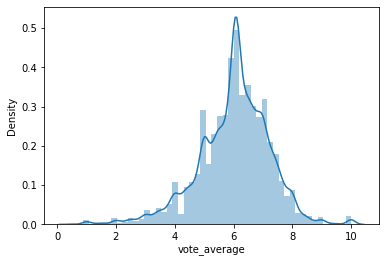

In [127]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

It appears that Users in this dataset are extremely strict in their ratings. The mean rating is only a 5.6 on a scale of 10. Half the movies have a rating of less than or equal to 6

Let's explore budget and revenue a bit more!

In [128]:
df['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

The mean budget of a film is 21.6 million dollars whereas the median budget is far smaller at 8 million dollars. This strongly suggests the mean being influenced by outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


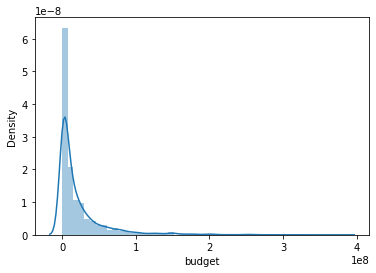

In [129]:
sns.distplot(df[df['budget'].notnull()]['budget'])

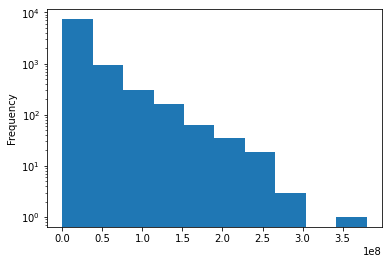

In [130]:
df['budget'].plot(logy=True, kind='hist')

The distribution of movie budgets shows an exponential decay. More than 75% of the movies have a budget smaller than 25 million dollars.

In [131]:
df['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

The mean gross of a movie is 68.7 million dollars whereas the median gross is much lower at 16.8 million dollars, suggesting the skewed nature of revenue. The lowest revenue generated by a movie is just 1 dollar whereas the highest grossing movie of all time is astonishing 2.78 billion dollars.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


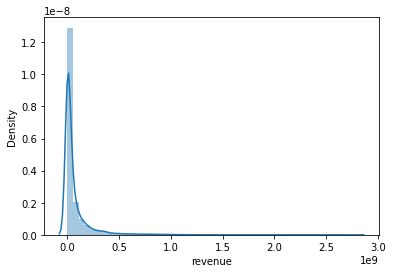

In [132]:
sns.distplot(df[df['revenue'].notnull()]['revenue'])

The distribution of revenue undergoes exponential decay just like budget.

In [133]:
#Let's check the number of missing values in the dataset
df.isnull().sum()

budget          36576
genres              0
popularity          6
revenue         38058
vote_average     3004
vote_count          6
return          40085
dtype: int64

As mentioned earlier our original dataset has lot of missing values but our analysis can still be done with the small set of rows as well. I will be further exploring these in our outlier detection section.

In [134]:
#Dropping rows with missing values
df.dropna(inplace=True)
#Check the number of missing values to ensure we have none
df.isnull().sum()

budget          0
genres          0
popularity      0
revenue         0
vote_average    0
vote_count      0
return          0
dtype: int64

I will perform the following feature engineering tasks:

1. Round up popularity values to 2 decimal values and I will be converting those into integer datatypes.
2. I will be creating dummy variables for column: genres

In [135]:
df["popularity"] = np.round(pd.to_numeric(df.popularity, errors='coerce'),2)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5374 entries, 0 to 45422
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        5374 non-null   float64
 1   genres        5374 non-null   object 
 2   popularity    5374 non-null   float64
 3   revenue       5374 non-null   float64
 4   vote_average  5374 non-null   float64
 5   vote_count    5374 non-null   float64
 6   return        5374 non-null   float64
dtypes: float64(6), object(1)
memory usage: 335.9+ KB


(5374, 7)

In [136]:
#converting 'genre' column into panda series and extract the type of the genre only from the column
s = pd.Series(df['genres'], dtype= str)
s1=s.str.split(pat="'",expand=True)
df['genre_ed']=s1[5]

In [137]:
#count of each genre in the dataset
df['genre_ed'].value_counts()

Drama              1313
Comedy             1067
Action              960
Adventure           416
Horror              325
Crime               267
Thriller            199
Animation           146
Fantasy             140
Romance             121
Science Fiction     104
Mystery              67
Family               55
Documentary          47
War                  38
Music                34
Western              31
History              29
Foreign               4
TV Movie              1
Name: genre_ed, dtype: int64

The dataset has most rows for Drama and Comedy. I will concentrate only gneres which has more than 100 rows

In [138]:
#Remove rows for genres with count less than 100
df=df[~df['genre_ed'].isin(['Mystery', 'Family', 'Documentary', 'War', 'Music', 'Western', 'History', 'Foreign', 'TV Movie'])]

In [139]:
df.drop(df[df['budget'] < 1000000].index, inplace=True)
#df.drop(df[df['vote_count'] < 100].index, inplace=True)
df.drop(df[df['revenue'] < 2000000].index, inplace=True)
#df.drop(df[df['vote_average'] == 0].index, inplace=True)
df.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(4255, 8)

In [140]:
#Drop original column from dataset
df.drop(['genres'], axis=1, inplace=True)
#get dummy columns for genre
df= pd.get_dummies(df, columns=["genre_ed"])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4255 entries, 0 to 45250
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   budget                    4255 non-null   float64
 1   popularity                4255 non-null   float64
 2   revenue                   4255 non-null   float64
 3   vote_average              4255 non-null   float64
 4   vote_count                4255 non-null   float64
 5   return                    4255 non-null   float64
 6   genre_ed_Action           4255 non-null   uint8  
 7   genre_ed_Adventure        4255 non-null   uint8  
 8   genre_ed_Animation        4255 non-null   uint8  
 9   genre_ed_Comedy           4255 non-null   uint8  
 10  genre_ed_Crime            4255 non-null   uint8  
 11  genre_ed_Drama            4255 non-null   uint8  
 12  genre_ed_Fantasy          4255 non-null   uint8  
 13  genre_ed_Horror           4255 non-null   uint8  
 14  genre_e

,budget,popularity,revenue,vote_average,vote_count,return,genre_ed_Action,genre_ed_Adventure,genre_ed_Animation,genre_ed_Comedy,genre_ed_Crime,genre_ed_Drama,genre_ed_Fantasy,genre_ed_Horror,genre_ed_Romance,genre_ed_Science Fiction,genre_ed_Thriller
0,30000000.0,21.95,373554033.0,7.7,5415.0,12.451801,0,0,1,0,0,0,0,0,0,0,0
1,65000000.0,17.02,262797249.0,6.9,2413.0,4.043035,0,1,0,0,0,0,0,0,0,0,0
3,16000000.0,3.86,81452156.0,6.1,34.0,5.090760,0,0,0,1,0,0,0,0,0,0,0
5,60000000.0,17.92,187436818.0,7.7,1886.0,3.123947,1,0,0,0,0,0,0,0,0,0,0
8,35000000.0,5.23,64350171.0,5.5,174.0,1.838576,1,0,0,0,0,0,0,0,0,0,0


In [141]:
#Summary statistics of dataset 
df.describe()

,budget,popularity,revenue,vote_average,vote_count,return,genre_ed_Action,genre_ed_Adventure,genre_ed_Animation,genre_ed_Comedy,genre_ed_Crime,genre_ed_Drama,genre_ed_Fantasy,genre_ed_Horror,genre_ed_Romance,genre_ed_Science Fiction,genre_ed_Thriller
count,4.255000e+03,4255.000000,4.255000e+03,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000
mean,3.644988e+07,10.570820,1.076752e+08,6.290881,860.522444,4.132138,0.207756,0.089307,0.031962,0.211516,0.051469,0.236193,0.028907,0.059929,0.021857,0.021857,0.038308
std,4.202929e+07,11.798288,1.755071e+08,0.863542,1339.260543,7.851683,0.405749,0.285219,0.175921,0.408431,0.220978,0.424792,0.167565,0.237384,0.146233,0.146233,0.191961
min,1.000000e+06,0.010000,2.000000e+06,2.500000,1.000000,0.047879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000e+06,6.450000,1.494000e+07,5.750000,130.000000,1.090403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.200000e+07,9.100000,4.401737e+07,6.300000,368.000000,2.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.700000e+07,12.330000,1.219721e+08,6.900000,981.000000,4.318010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.800000e+08,294.340000,2.787965e+09,9.100000,14075.000000,190.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


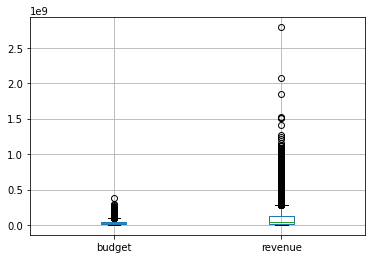

In [142]:
#Let's check for outliers
df.boxplot(column=['budget', 'revenue'])

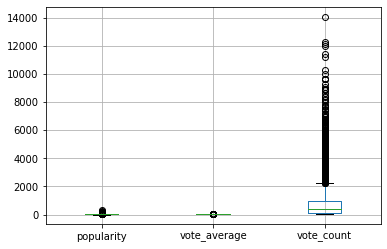

In [143]:
df.boxplot(column=['popularity', 'vote_average', 'vote_count'])

In [144]:
df_o= df[(np.nan_to_num(np.abs(stats.zscore(df,nan_policy='omit')),0) < 3).all(axis=1)]

In [145]:
df.shape
print ('Shape of original input dataset:', df.shape)
#After removing outliers
df_o.shape
print ('Shape of input dataset after removing outliers:', df_o.shape)

Shape of original input dataset: (4255, 17)
Shape of input dataset after removing outliers: (2645, 17)


In [146]:
Q1 = df_o.quantile(0.25)
Q3 = df_o.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

budget                      3.100000e+07
popularity                  5.420000e+00
revenue                     8.061701e+07
vote_average                1.200000e+00
vote_count                  6.320000e+02
return                      2.998467e+00
genre_ed_Action             1.000000e+00
genre_ed_Adventure          0.000000e+00
genre_ed_Animation          0.000000e+00
genre_ed_Comedy             1.000000e+00
genre_ed_Crime              0.000000e+00
genre_ed_Drama              1.000000e+00
genre_ed_Fantasy            0.000000e+00
genre_ed_Horror             0.000000e+00
genre_ed_Romance            0.000000e+00
genre_ed_Science Fiction    0.000000e+00
genre_ed_Thriller           0.000000e+00
dtype: float64


In [147]:
df_out = df_o[~((df_o < (Q1 - 1.5 * IQR)) |(df_o > (Q3 + 1.5 * IQR))).any(axis=1)]

In [148]:
print ('Shape of input dataset after managing misspread:', df_out.shape)

Shape of input dataset after managing misspread: (2106, 17)


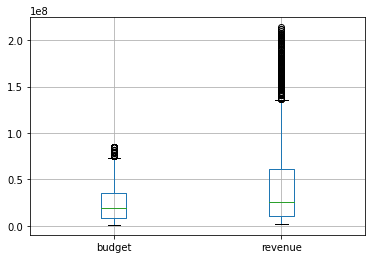

In [149]:
df_out.boxplot(column=['budget', 'revenue'])

In [150]:
df_out_high = df_out.apply(lambda x : True
            if x['revenue'] > 13500000 or x['budget'] > 30000000 else False, axis = 1) 
num_rows = len(df_out_high[df_out_high == True].index) 
  
print('Number of Rows in dataframe with revenue more than 13.5 million dollars or budget more than 30 million: ', 
      num_rows ) 

Number of Rows in dataframe with revenue more than 13.5 million dollars or budget more than 30 million:  1482


In [151]:
df_out.drop(df_out[df_out['revenue'] > 13500000].index, inplace=True)
df_out.drop(df_out[df_out['budget'] > 30000000].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


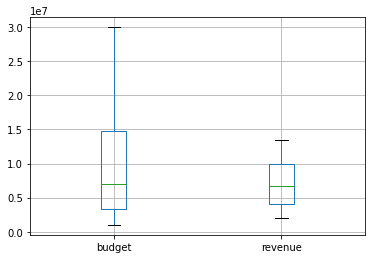

In [152]:
df_out.boxplot(column=['budget', 'revenue'])

Looking at the range I can say the dataset has movies which are high budget, low revenue.

In [153]:
df_out['revenue'].describe()

count    6.240000e+02
mean     7.017731e+06
std      3.370582e+06
min      2.000000e+06
25%      4.069512e+06
50%      6.737532e+06
75%      1.000000e+07
max      1.350000e+07
Name: revenue, dtype: float64

In [154]:
# recode the revenue into high and low
df_out['Revenue'] = 0
df_out.loc[df_out['revenue'] <7017731,'Revenue'] = 0
df_out.loc[df_out['revenue'] >=7017731,'Revenue'] = 1
df_out.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,budget,popularity,revenue,vote_average,vote_count,return,genre_ed_Action,genre_ed_Adventure,genre_ed_Animation,genre_ed_Comedy,genre_ed_Crime,genre_ed_Drama,genre_ed_Fantasy,genre_ed_Horror,genre_ed_Romance,genre_ed_Science Fiction,genre_ed_Thriller,Revenue
51,15000000.0,15.90,6700000.0,6.7,145.0,0.446667,0,0,0,1,0,0,0,0,0,0,0,0
74,15000000.0,2.94,2042530.0,3.9,16.0,0.136169,0,0,0,1,0,0,0,0,0,0,0,0
117,25000000.0,1.52,6278139.0,5.1,7.0,0.251126,0,0,0,1,0,0,0,0,0,0,0,0
167,20000000.0,14.81,7563728.0,6.2,406.0,0.378186,1,0,0,0,0,0,0,0,0,0,0,1
172,1500000.0,4.88,7412216.0,6.8,280.0,4.941477,0,0,0,0,0,1,0,0,0,0,0,1


In [155]:
# check distribution of target variable
df_out['Revenue'].value_counts()

0    336
1    288
Name: Revenue, dtype: int64

In [156]:
df_out.drop(['revenue'],axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [157]:
df_out

,budget,popularity,vote_average,vote_count,return,genre_ed_Action,genre_ed_Adventure,genre_ed_Animation,genre_ed_Comedy,genre_ed_Crime,genre_ed_Drama,genre_ed_Fantasy,genre_ed_Horror,genre_ed_Romance,genre_ed_Science Fiction,genre_ed_Thriller,Revenue
51,15000000.0,15.90,6.7,145.0,0.446667,0,0,0,1,0,0,0,0,0,0,0,0
74,15000000.0,2.94,3.9,16.0,0.136169,0,0,0,1,0,0,0,0,0,0,0,0
117,25000000.0,1.52,5.1,7.0,0.251126,0,0,0,1,0,0,0,0,0,0,0,0
167,20000000.0,14.81,6.2,406.0,0.378186,1,0,0,0,0,0,0,0,0,0,0,1
172,1500000.0,4.88,6.8,280.0,4.941477,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44103,5000000.0,0.41,5.6,7.0,0.783946,1,0,0,0,0,0,0,0,0,0,0,0
44129,5000000.0,8.97,6.4,25.0,1.340000,0,0,0,0,0,1,0,0,0,0,0,0
44711,8500000.0,1.54,4.7,14.0,0.674188,1,0,0,0,0,0,0,0,0,0,0,0
44848,2000000.0,1.46,5.3,9.0,5.833044,0,0,0,1,0,0,0,0,0,0,0,1


# 3) Split Data into X and Y

In [158]:
# Assign X and Y
X = df_out.drop(['Revenue'], axis=1)
y = df_out['Revenue']

print(X.shape)
print(y.shape)

(624, 16)
(624,)


In [159]:
import imblearn.under_sampling as u
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

X,y = make_classification(n_features = 16, n_samples=312) 
# Make classification default = 20, so I need to set the number
ros = u.RandomUnderSampler(sampling_strategy='majority')
X_resampled, Y_resampled = ros.fit_resample(X, y)

In [160]:
X_resampled = pd.DataFrame(X_resampled)
print(X_resampled.shape)

Y_resampled = pd.DataFrame(Y_resampled)
print(Y_resampled.shape)

(310, 16)
(310, 1)


In [161]:
X_resampled.columns = ['budget', 'popularity', 'vote_average', 'vote_count','return',
       'genre_ed_Action', 'genre_ed_Adventure', 'genre_ed_Animation',
       'genre_ed_Comedy', 'genre_ed_Crime', 'genre_ed_Drama',
       'genre_ed_Fantasy', 'genre_ed_Horror', 'genre_ed_Romance',
       'genre_ed_Science Fiction', 'genre_ed_Thriller']

In [162]:
X_resampled

,budget,popularity,vote_average,vote_count,return,genre_ed_Action,genre_ed_Adventure,genre_ed_Animation,genre_ed_Comedy,genre_ed_Crime,genre_ed_Drama,genre_ed_Fantasy,genre_ed_Horror,genre_ed_Romance,genre_ed_Science Fiction,genre_ed_Thriller
0,1.846469,1.282066,-1.263441,-0.272411,2.108029,0.335009,-2.080483,0.528777,-0.149107,-1.506415,-1.343031,-3.119663,-0.062748,-0.814628,0.088744,1.082756
1,0.618475,2.182981,-2.140589,-1.433647,0.961092,-0.097176,-1.282071,0.720880,-1.805027,0.276191,-1.341872,0.194364,1.155886,0.309321,2.291337,-0.883438
2,2.210608,0.320243,-1.352090,1.165471,-0.347026,-0.089673,-0.219642,0.707719,1.508215,-0.910626,-1.524518,0.620267,-0.603283,-1.385405,0.255581,1.412749
3,2.661265,-0.988553,-1.440161,-0.631828,-1.843400,-0.816821,0.574384,0.339254,0.599620,-0.276357,-1.737884,-1.463156,-0.979793,-1.127033,-1.042343,1.836848
4,1.696721,-0.502090,-1.772586,-1.579814,0.622539,-0.409117,1.705254,0.096973,1.311342,0.711625,-1.551784,-2.869414,0.296505,-0.086956,0.789643,0.551175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,-0.411653,-0.060995,0.173538,-0.345793,2.351842,-0.201201,-0.220623,0.986373,0.463482,2.018533,0.243251,-0.219805,-3.101002,-0.303930,1.199995,-0.319850
306,0.817520,1.642295,1.178470,0.528715,-1.634626,-0.302321,-0.733614,1.530000,0.546612,-0.249475,0.308024,-0.616081,-1.054687,-0.826094,-0.819280,1.740337
307,-0.253257,-1.829597,0.940652,-0.015483,-0.252963,0.223671,-2.001960,1.506602,2.100021,-1.158086,0.582777,0.198009,-0.289298,-0.641405,-1.803393,0.408272
308,-0.822772,0.101952,0.300890,0.959425,0.780225,1.095802,1.163104,-1.557074,1.300012,-1.044935,0.462314,-0.803540,-1.125618,0.898376,-1.341134,-0.672633


In [163]:
# I will be performing 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 42)

In [164]:
X_train

,budget,popularity,vote_average,vote_count,return,genre_ed_Action,genre_ed_Adventure,genre_ed_Animation,genre_ed_Comedy,genre_ed_Crime,genre_ed_Drama,genre_ed_Fantasy,genre_ed_Horror,genre_ed_Romance,genre_ed_Science Fiction,genre_ed_Thriller
126,1.963140,2.328958,-2.507651,-1.488380,-1.152752,0.328095,1.081302,0.917363,0.573832,-0.860841,-2.032674,-0.036701,-0.801116,-0.906174,0.047518,0.306324
109,1.758943,0.064439,-0.659302,0.300127,-0.692998,-0.881081,0.673351,-0.662894,-0.178236,-0.229859,-0.996684,-0.645832,0.222527,-1.507873,-1.837412,1.426328
247,0.129881,-1.084258,1.277576,0.855774,-0.557800,-0.069426,0.633472,-0.461489,0.329826,1.146892,0.615269,-0.024744,1.458395,0.011373,0.233222,1.067624
234,-2.410041,-2.213558,1.622869,-1.155360,-0.726484,-0.426233,0.639090,0.024794,-1.551948,0.938354,1.739341,-0.113879,-0.398855,-0.161201,-0.224715,-1.432237
202,-1.356691,-0.305501,0.867147,0.606035,0.172948,0.426813,0.209540,-0.330497,1.131386,-0.871438,0.955022,-1.456748,-1.371468,0.191311,-1.071394,-0.839934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1.349418,-0.649399,1.272620,-0.880872,0.773788,-0.616509,-2.023056,0.278124,-0.473472,-0.443925,1.162920,1.927407,-0.271534,-1.042233,0.263353,-0.537856
71,-1.180955,1.090111,0.022970,-0.719679,-0.727168,-0.135073,-0.088788,0.024983,0.394395,-0.488827,0.451188,1.023018,1.836658,0.949087,1.685198,-1.262150
106,2.488636,1.539388,-1.440558,0.862251,-1.364037,-0.080536,0.323379,0.046125,0.674609,-1.669730,-1.673881,0.589276,-0.546113,0.335386,-0.268975,1.649626
270,0.257387,-0.249431,0.867976,0.618818,2.184708,0.908135,2.322972,-0.059429,0.173398,-0.532453,0.355095,1.197998,-0.177278,0.324161,-0.161142,0.908501


In [165]:
# check your work - does the shape match what you think it should be?
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(248, 16) (62, 16) (248, 1) (62, 1)


# 4) Modeling

Fit at least two reasonable different DL models and one baseline model with clean code (lots of comments).

# 4-1) Baseline Model: Logistic Regression

In [166]:
#Fit the model
# make a variable to store the general model
LR = LogisticRegression()
# fit the model - one line of code
LR = LR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [167]:
# store the predictions
train_preds_LR = LR.predict(X_train) 
test_preds_LR = LR.predict(X_test) 

In [168]:
#Evaluate the model
# train confusion matrix
confusion_matrix(y_train, train_preds_LR)

array([[117,   8],
       [  6, 117]])

In [169]:
# test confusion matrix
confusion_matrix(y_test, test_preds_LR)

array([[29,  1],
       [ 3, 29]])

In [170]:
# extract TP, TN, FP, FN
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_LR).ravel()
(tn, fp, fn, tp)

(29, 1, 3, 29)

In [171]:
print(classification_report(y_test, test_preds_LR))
plt.savefig('baseline_accuracy.png') 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.97      0.91      0.94        32

    accuracy                           0.94        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.94      0.94      0.94        62



<Figure size 432x288 with 0 Axes>

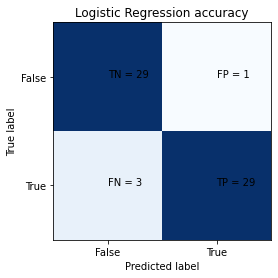

In [172]:
cm = confusion_matrix(y_test, test_preds_LR)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['False','True']
plt.title('Logistic Regression accuracy')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))

# plt.savefig("Logistic_regression_accuracy.png")
# images_dir = '/content/drive/Shared drives/Deep Learning Group Projects/Project #1 /Work'
plt.savefig("Logistic_regression_accuracy.png")
# plt.show()

# 4-2) Deep Learning Model #1: Dense Neural Network

In [204]:
# Setting up the model
model1 = Sequential()
# this is hidden layer 1
model1.add(Dense(512,activation='relu', input_shape=(X.shape[1],))) # input shape is = (features,)
# this is hidden layer 2
model1.add(Dense(128, activation='relu'))
# this is hidden layer 3
model1.add(Dense(15, activation='relu'))
# this is hidden layer 4
model1.add(Dense(10, activation='relu'))
# this is the output node
model1.add(Dense(1, activation='sigmoid')) # the activation function here is 'linear' by default
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 512)               8704      
                                                                 
 dense_39 (Dense)            (None, 128)               65664     
                                                                 
 dense_40 (Dense)            (None, 15)                1935      
                                                                 
 dense_41 (Dense)            (None, 10)                160       
                                                                 
 dense_42 (Dense)            (None, 1)                 11        
                                                                 
Total params: 76,474
Trainable params: 76,474
Non-trainable params: 0
_________________________________________________________________


In [205]:
#  this compiles the model, specifies model evaluation metrics
model1.compile(optimizer='Adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [206]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True)
# fit model
history = model1.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=4000, 
                    batch_size = 44,
                    verbose=1, 
                    callbacks=[es]) #notice we won't have to manually watch it

Epoch 1/4000
6/6 [==============================] - 1s 55ms/step - loss: 0.6295 - accuracy: 0.7177 - val_loss: 0.5216 - val_accuracy: 0.8871
Epoch 2/4000
6/6 [==============================] - 0s 12ms/step - loss: 0.4462 - accuracy: 0.8992 - val_loss: 0.3581 - val_accuracy: 0.9355
Epoch 3/4000
6/6 [==============================] - 0s 8ms/step - loss: 0.2770 - accuracy: 0.9395 - val_loss: 0.2477 - val_accuracy: 0.9355
Epoch 4/4000
6/6 [==============================] - 0s 10ms/step - loss: 0.1703 - accuracy: 0.9516 - val_loss: 0.2025 - val_accuracy: 0.9355
Epoch 5/4000
6/6 [==============================] - 0s 10ms/step - loss: 0.1286 - accuracy: 0.9637 - val_loss: 0.2070 - val_accuracy: 0.9355
Epoch 6/4000
6/6 [==============================] - 0s 9ms/step - loss: 0.1040 - accuracy: 0.9677 - val_loss: 0.1972 - val_accuracy: 0.9516
Epoch 7/4000
6/6 [==============================] - 0s 9ms/step - loss: 0.0895 - accuracy: 0.9718 - val_loss: 0.2072 - val_accuracy: 0.9516
Epoch 8/4000
6/6

In [207]:
history_dict = history.history
history_dict.keys() 

# out of all of these, let's plot the val_mean_absolute_error

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

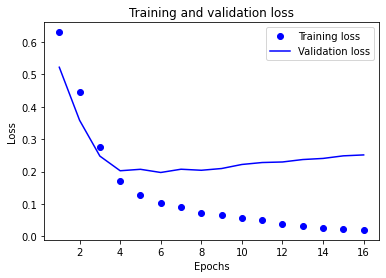

In [208]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("Test_valid_loss_DDN_withoutdropout.png")
# images_dir = '/content/drive/Shared drives/Deep Learning Group Projects/Project #1 /Work'
# plt.savefig(f"{images_dir}/Test_valid_loss_DDN_withoutdropout.png")
# plt.show()

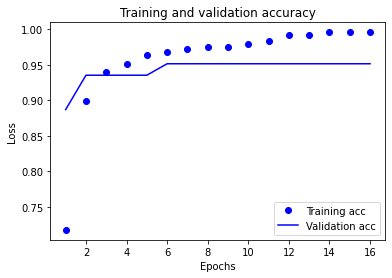

In [209]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("Accuracy_DDN_withoutdropout.png")
# images_dir = '/content/drive/Shared drives/Deep Learning Group Projects/Project #1 /Work'
# plt.savefig(f"{images_dir}/Accuracy_DDN_withoutdropout.png")
# plt.show()

In [210]:
# see how the model did!
# if you don't round to a whole number (0 or 1), the confusion matrix won't work!
preds = np.round(model1.predict(X_test),0)

# confusion matrix
confusion_matrix(y_test, preds) # order matters! (actual, predicted)

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

# look at documentation for conf matrix on sklearn if you have questions!

2/2 [==============================] - 0s 9ms/step


array([[29,  1],
       [ 2, 30]])

In [211]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.97      0.94      0.95        32

    accuracy                           0.95        62
   macro avg       0.95      0.95      0.95        62
weighted avg       0.95      0.95      0.95        62



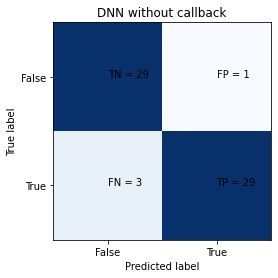

In [181]:
cm = confusion_matrix(y_test, preds)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['False','True']
plt.title('DNN without callback')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))

plt.savefig("DNN_withoutdropout_confusion_matrix.png")
# images_dir = '/content/drive/Shared drives/Deep Learning Group Projects/Project #1 /Work'
# plt.savefig(f"{images_dir}/DNN_withoutdropout_confusion_matrix.png")
# plt.show()

# 4-3) Deep Learning Model #2: Dense Neural Network

In [212]:
# Setting up the model
model2 = Sequential()
# this is hidden layer 1
model2.add(Dense(512,activation='relu', input_shape=(X.shape[1],))) # input shape is = (features,)
model2.add(Dropout(0.4)) # Dropout Layer 1
# this is hidden layer 2
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3)) #Dropout Layer 2
# this is hidden layer 3
model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2)) #Dropout Layer 3
# this is the output node
model2.add(Dense(1, activation='sigmoid')) # the activation function here is 'linear' by default
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 512)               8704      
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_44 (Dense)            (None, 128)               65664     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_45 (Dense)            (None, 10)                1290      
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_46 (Dense)            (None, 1)                

In [213]:
#  this compiles the model, specifies model evaluation metrics
model2.compile(optimizer='Adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [214]:
from keras.callbacks import EarlyStopping
es2 = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True)
# fit model
history2 = model2.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=4000, 
                    batch_size = 44,
                    verbose=1, 
                    callbacks=[es2]) #notice we won't have to manually watch it

Epoch 1/4000
6/6 [==============================] - 1s 59ms/step - loss: 0.6541 - accuracy: 0.6250 - val_loss: 0.5627 - val_accuracy: 0.8871
Epoch 2/4000
6/6 [==============================] - 0s 12ms/step - loss: 0.5092 - accuracy: 0.8427 - val_loss: 0.4138 - val_accuracy: 0.9355
Epoch 3/4000
6/6 [==============================] - 0s 15ms/step - loss: 0.3728 - accuracy: 0.8831 - val_loss: 0.2932 - val_accuracy: 0.9355
Epoch 4/4000
6/6 [==============================] - 0s 11ms/step - loss: 0.2817 - accuracy: 0.8790 - val_loss: 0.2215 - val_accuracy: 0.9355
Epoch 5/4000
6/6 [==============================] - 0s 10ms/step - loss: 0.2452 - accuracy: 0.9113 - val_loss: 0.1922 - val_accuracy: 0.9355
Epoch 6/4000
6/6 [==============================] - 0s 9ms/step - loss: 0.2043 - accuracy: 0.9234 - val_loss: 0.2044 - val_accuracy: 0.9355
Epoch 7/4000
6/6 [==============================] - 0s 10ms/step - loss: 0.1858 - accuracy: 0.9194 - val_loss: 0.2148 - val_accuracy: 0.9355
Epoch 8/4000
6

In [215]:
history_dict2 = history2.history
history_dict2.keys() 

# out of all of these, let's plot the val_mean_absolute_error

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

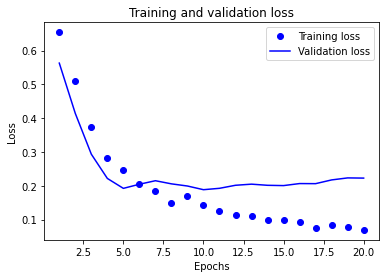

In [216]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(1, len(acc2) + 1)

# "bo" is for "blue dot"
plt.plot(epochs2, loss2, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("trial1_Test_valid_loss_DDN_withdropout.png")
# images_dir = '/content/drive/Shared drives/Deep Learning Group Projects/Project #1 /Work'
# plt.savefig(f"{images_dir}/trial1_Test_valid_loss_DDN_withdropout.png")


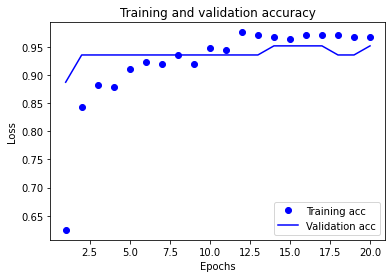

In [217]:
plt.clf()   # clear figure
acc_values2 = history_dict2['accuracy']
val_acc_values2 = history_dict2['val_accuracy']

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("trial1_accuracy_DDN_withdropout.png")
# images_dir = '/content/drive/Shared drives/Deep Learning Group Projects/Project #1 /Work'
# plt.savefig(f"{images_dir}/trial1_accuracy_DDN_withdropout.png")

In [219]:
# see how the model did!
# if you don't round to a whole number (0 or 1), the confusion matrix won't work!
preds2 = np.round(model2.predict(X_test),0)

# confusion matrix
confusion_matrix(y_test, preds2) # order matters! (actual, predicted)

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

# look at documentation for conf matrix on sklearn if you have questions!

2/2 [==============================] - 0s 7ms/step


array([[29,  1],
       [ 3, 29]])

In [220]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.97      0.91      0.94        32

    accuracy                           0.94        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.94      0.94      0.94        62



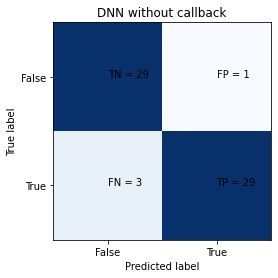

In [190]:
cm = confusion_matrix(y_test, preds2)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['False','True']
plt.title('DNN without callback')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))

# plt.savefig("Trail1_DNN_withdropout_confusion_matrix.png")
# images_dir = '/content/drive/Shared drives/Deep Learning Group Projects/Project #1 /Work'
# plt.savefig(f"{images_dir}/Trail1_DNN_withdropout_confusion_matrix.png")

# 4-4) Deep Learning Model #3: Dense Neural Network

In [191]:
# Setting up the model
model3 = Sequential()
# this is hidden layer 1
model3.add(Dense(512,activation='relu', input_shape=(X.shape[1],))) # input shape is = (features,)
# this is hidden layer 2
model3.add(Dense(128, activation='relu'))
# this is hidden layer 3
model3.add(Dense(50, activation='relu'))
# this is hidden layer 4
model3.add(Dense(20, activation='relu'))
# this is the output node
model3.add(Dense(1, activation='sigmoid')) # the activation function here is 'linear' by default
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 512)               8704      
                                                                 
 dense_34 (Dense)            (None, 128)               65664     
                                                                 
 dense_35 (Dense)            (None, 50)                6450      
                                                                 
 dense_36 (Dense)            (None, 20)                1020      
                                                                 
 dense_37 (Dense)            (None, 1)                 21        
                                                                 
Total params: 81,859
Trainable params: 81,859
Non-trainable params: 0
_________________________________________________________________


In [192]:
#  this compiles the model, specifies model evaluation metrics
model3.compile(optimizer='Adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [221]:
from keras.callbacks import EarlyStopping
es3 = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True)
# fit model
history3 = model3.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=4000, 
                    batch_size = 44,
                    verbose=1, 
                    callbacks=[es3]) #notice we won't have to manually watch it

Epoch 1/4000
6/6 [==============================] - 0s 17ms/step - loss: 0.1156 - accuracy: 0.9637 - val_loss: 0.2113 - val_accuracy: 0.9355
Epoch 2/4000
6/6 [==============================] - 0s 9ms/step - loss: 0.0970 - accuracy: 0.9677 - val_loss: 0.2018 - val_accuracy: 0.9516
Epoch 3/4000
6/6 [==============================] - 0s 9ms/step - loss: 0.0801 - accuracy: 0.9758 - val_loss: 0.2182 - val_accuracy: 0.9355
Epoch 4/4000
6/6 [==============================] - 0s 9ms/step - loss: 0.0637 - accuracy: 0.9718 - val_loss: 0.2073 - val_accuracy: 0.9516
Epoch 5/4000
6/6 [==============================] - 0s 9ms/step - loss: 0.0466 - accuracy: 0.9879 - val_loss: 0.2304 - val_accuracy: 0.9516
Epoch 6/4000
6/6 [==============================] - 0s 9ms/step - loss: 0.0319 - accuracy: 0.9919 - val_loss: 0.2418 - val_accuracy: 0.9355
Epoch 7/4000
6/6 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.9919 - val_loss: 0.2527 - val_accuracy: 0.9516
Epoch 8/4000
6/6 [=

In [222]:
history_dict3 = history3.history
history_dict3.keys() 

# out of all of these, let's plot the val_mean_absolute_error

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

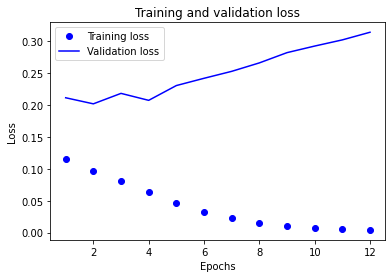

In [223]:
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs3 = range(1, len(acc3) + 1)

# "bo" is for "blue dot"
plt.plot(epochs3, loss3, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs3, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("trial2_train_valid__loss.png")
# images_dir = '/content/drive/Shared drives/Deep Learning Group Projects/Project #1 /Work'
# plt.savefig(f"{images_dir}/trial2_train_valid__loss.png")


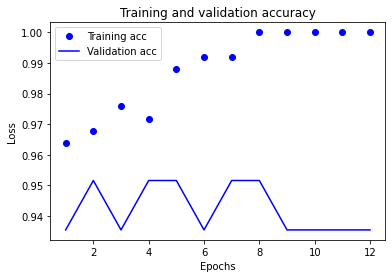

In [224]:
plt.clf()   # clear figure
acc_values3 = history_dict3['accuracy']
val_acc_values3 = history_dict3['val_accuracy']

plt.plot(epochs3, acc3, 'bo', label='Training acc')
plt.plot(epochs3, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("trial2_accuracy.png")
# images_dir = '/content/drive/Shared drives/Deep Learning Group Projects/Project #1 /Work'
# plt.savefig(f"{images_dir}/trial2_accuracy.png")

In [225]:
# see how the model did!
# if you don't round to a whole number (0 or 1), the confusion matrix won't work!
preds3 = np.round(model3.predict(X_test),0)

# confusion matrix
confusion_matrix(y_test, preds3) # order matters! (actual, predicted)

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

# look at documentation for conf matrix on sklearn if you have questions!

2/2 [==============================] - 0s 8ms/step


array([[29,  1],
       [ 2, 30]])

In [226]:
print(classification_report(y_test, preds3))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.97      0.94      0.95        32

    accuracy                           0.95        62
   macro avg       0.95      0.95      0.95        62
weighted avg       0.95      0.95      0.95        62



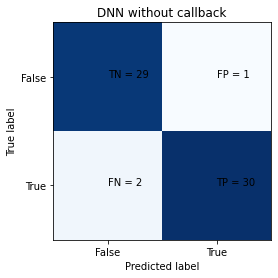

In [227]:
cm = confusion_matrix(y_test, preds3)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['False','True']
plt.title('DNN without callback')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))

plt.savefig("Trail2_confusion_matrix.png")
# images_dir = '/content/drive/Shared drives/Deep Learning Group Projects/Project #1 /Work'
# plt.savefig(f"{images_dir}/Trail2_confusion_matrix.png")
plt.show()

8/8 [==============================] - 0s 3ms/step


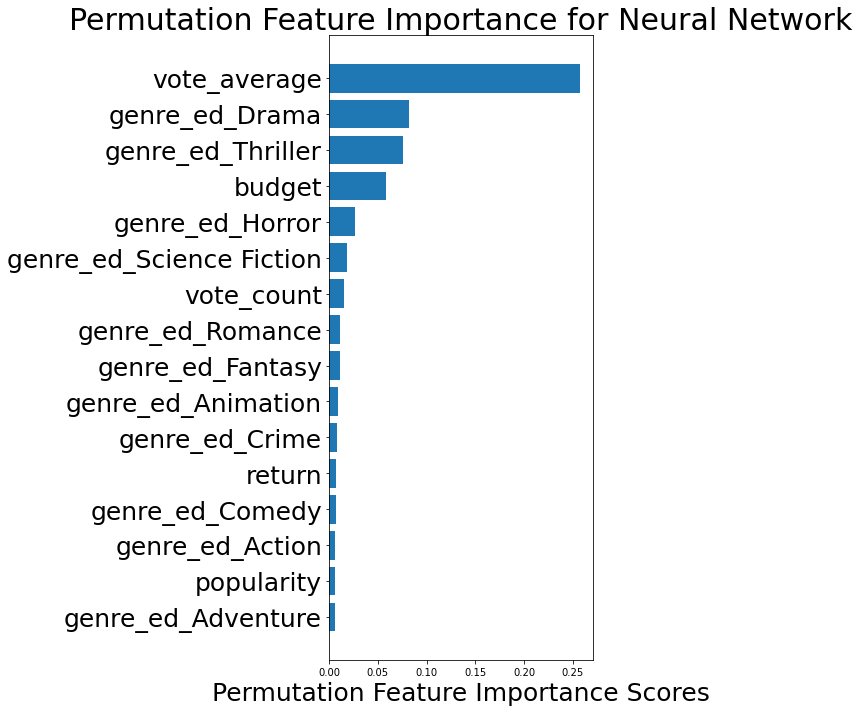

In [200]:
#Feature Importance for NN

from sklearn.inspection import permutation_importance

results = permutation_importance(model2, X_train, y_train, scoring='neg_root_mean_squared_error')

plt.figure(figsize=(10,10))

#get importance
importance_nn = results.importances_mean
sorted_idx = np.argsort(importance_nn)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, importance_nn[sorted_idx],align='center')

plt.yticks(pos, X_train.columns[sorted_idx],fontsize=25)
plt.xlabel('Permutation Feature Importance Scores', fontsize=25)
#plt.xticks(fontsize=100)
plt.title('Permutation Feature Importance for Neural Network', fontsize=30)

plt.tight_layout()

plt.show()

# Results

* I implemented a based line model(logistic regression) and 3 Dense Neural Network models with dropout function and without dropout. Moreover, I adjust dense layers of dense neural network models. The best algorithm suited to solve the business problem is DNN3(Accuracy of 0.97)
 
* The logistic regression had a accuracy of 0.92

* The best model of DNN3 had a accuracy of 0.97

* I found that with dropout function further improved the performance of the model. As I see in the confusion matrix for with dropout model of DNN2, I get a high accuracy rate of 0.94 compared to without the dropout model of DNN1 After using dropout and we decided to adjust the dense layers for finding the best accuracy. 

* I changed the dense layers “50, 25, 15, 10” combination to “20, 50, 50, 20” and I found that the adjusted version of dense layers and previous dense neural network results are different. DDN3 dense layers gave high accuracy. 

* Discussion Predicting movies' revenue can significantly impact the movie industries and is the prime focus area for movie companies to remain profitable. Hence, researchers worldwide had undertaken significant research to understand which factors can affect the increase in movie revenue. Factors such as budget, popularity, vote count, and movie genre can increase movie revenue.

# Conclusion
In this analysis of the data, I have identified multiple key factors to that influence movie revenue.
* Despite having an abundance of budget, Movie production houses struggle to make profits.It is I hope that the provided analysis gives production houses the tools and inspiration to rethink some of their current practices and implement actions that will help them focus on attracting right audience for their upcoming movies.
* During Exploratory Data Analysis I found that Vote_count would be the most significant feature identified by the classifier. Hence, production houses should invest more in marketing and advertisement of their movies well ahead of time.
* I found which variables can significant impact on the accuracy from the permutation featuring for DNN. ‘Vote_Average’ is the most important feature for increasing movie revenue. Thus, movie industries should consider the movie rate consistently.
* Most of significant variables are consisted from ‘movie genre’. The most popular genre of movie is ‘Drama’. And then ‘Horror’, ‘Action’, ‘Animation’, ‘Fantasy’, ‘comedy’. Thus, Movie industries should care of which movie genre can be popular and attract more people
* I assume that ‘budget’ could be the most important factor to impact on the movie revenue. Surprisingly, ‘budget’ is less impact factor to predict the success of movies.